<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [2]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

%matplotlib nbagg
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave

# remove the mean!!
x=x-np.mean(x)

noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.

#Save the data before noise is added for comparing against filtered data
dataBeforeNoise = xn-noise
dataBeforeNoise = dataBeforeNoise-np.mean(dataBeforeNoise)

# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

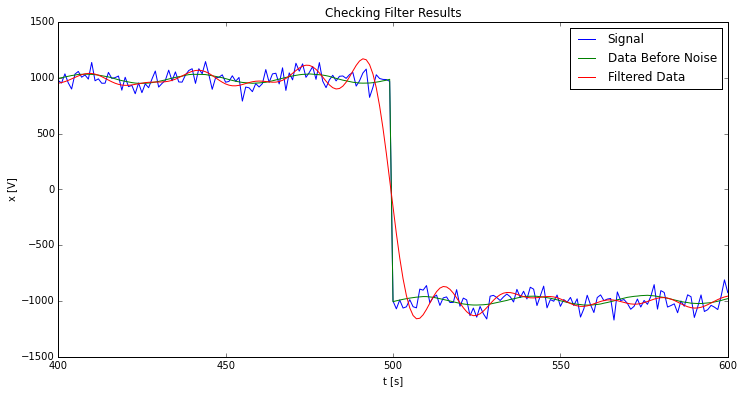

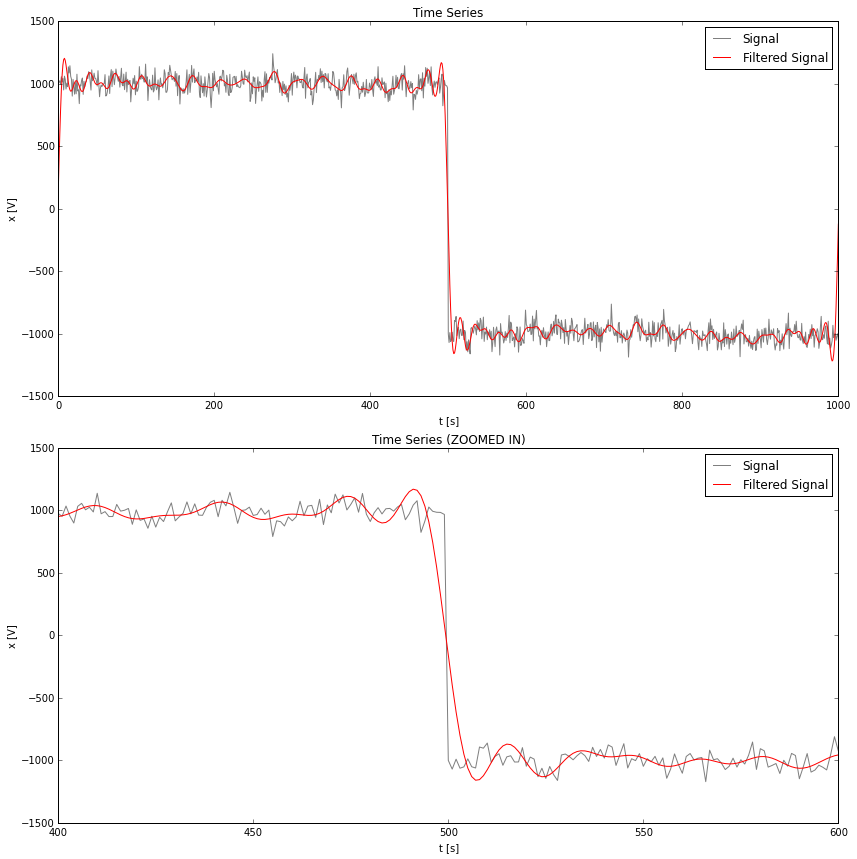

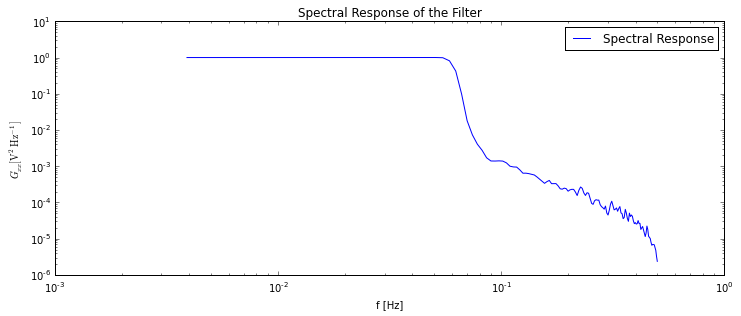

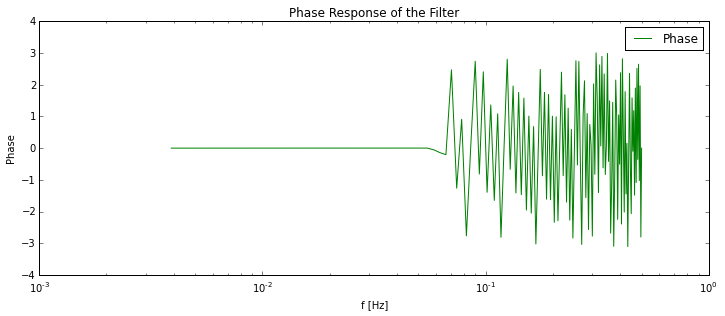

In [2]:
#Implement the filter
def filterData(data, cutoffFrequency):
    #Fourier transform from time to frequency domain
    X = np.fft.fft(data)
    N = np.shape(data)[0]
    frequencies = np.linspace(0,1./dt,N)
    
    #Apply the filter in the frequency domain
    X[ (frequencies>cutoffFrequency) & (frequencies<(1./dt-cutoffFrequency)) ] = 1.e-15
    
    #Inverse fourier transform back to the time domain
    filteredData = np.real(np.fft.ifft(X)) + np.mean(data)
    
    return filteredData

#Check how good the filter is
def checkFilter(data,dataBeforeNoise,filteredData,time):
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,1)
    
    ax=plt.subplot(gs[0:1])
    ax.plot(time,data,label='Signal')
    ax.plot(time,dataBeforeNoise,label='Data Before Noise')
    ax.plot(time,filteredData,label='Filtered Data')
    ax.set_xlabel('t [s]')
    ax.set_ylabel('x [V]')
    ax.set_title('Checking Filter Results')
    ax.set_xlim(left=400,right=600)
    ax.legend()
    
    return ax

#Plot the signal and the smoothed signal
def plotSignal(signal,smoothedSignal,time,k=None):
    #check for k input (x-axis for smoothed signal)
    time2 = time
    if k!=None:
        time2 = k
    
    plt.figure(figsize=(12,12))
    gs=gridspec.GridSpec(2,1)

    ax1=plt.subplot(gs[0:1])
    ax1.plot(time,signal,'k',label='Signal',alpha=0.5)
    ax1.plot(time2,smoothedSignal,color='red',label='Filtered Signal')
    ax1.set_xlabel('t [s]')
    ax1.set_ylabel('x [V]')
    ax1.set_title('Time Series')
    ax1.legend()
    
    ax2=plt.subplot(gs[1:2])
    ax2.plot(time,signal,'k',label='Signal',alpha=0.5)
    ax2.plot(time2,smoothedSignal,color='red',label='Filtered Signal')
    ax2.set_xlabel('t [s]')
    ax2.set_ylabel('x [V]')
    ax2.set_title('Time Series (ZOOMED IN)')
    ax2.set_xlim(left=400,right=600)
    ax2.legend()
    
    plt.tight_layout()
    
    return ax1,ax2

#Plot the spectral response
def plotSpectra(power,smoothedPower,freq,squared=False):
    #compute the spectral response
    H = np.abs(np.sqrt(smoothedPower/power))
    if squared:
        H = (smoothedPower/power)**2
    
    #Plot the spectral response
    plt.figure(figsize=(12,10))
    gs=gridspec.GridSpec(2,1)

    ax=plt.subplot(gs[0:1])
    #ax.plot(freq,power,'k',label='Spectral Response',alpha=0.5)
    #ax.plot(freq,smoothedPower,color='red',label='Filtered Spectral Response')
    ax.plot(freq,H,label='Spectral Response')
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel(r'$G_{xx} \mathrm{[V^2 Hz^{-1}]}$')
    ax.set_title('Spectral Response of the Filter')
    ax.loglog()
    ax.legend()
    
    return ax

#Plot the phase response angle
def plotPhase(crossPower,freq):
    #Compute the phase
    angle = np.angle(crossPower)
    #angle = np.angle(power)
    #smoothedAngle = np.angle(smoothedPower)
    
    #Plot the phase
    plt.figure(figsize=(12,10))
    gs=gridspec.GridSpec(2,1)
    
    ax=plt.subplot(gs[0:1])
    ax.plot(freq,angle,color='green',label='Phase')
    #ax.plot(freq,smoothedAngle/np.pi,color='red',label='Filtered Phase')
    ax.set_xlabel('f [Hz]')
    #ax.set_ylabel('$Phase / \pi$')
    ax.set_ylabel('Phase')
    ax.set_title('Phase Response of the Filter')
    ax.legend()
    ax.semilogx()
    
    return ax

#Run the functions
nfft = 2**8 #256
args = {'NFFT':nfft,'Fs':1./dt,'noverlap':nfft/2.,'window':mlab.window_hanning}
frequencyCutoff = 0.06
xn_filtered = filterData(xn,frequencyCutoff)
checkFilter(xn,dataBeforeNoise,xn_filtered,t)
plotSignal(xn,xn_filtered,t)
powerSignal,freq = mlab.csd(xn,xn,**args)
powerSignalFiltered,freq = mlab.csd(xn_filtered,xn_filtered,**args)
plotSpectra(powerSignal,powerSignalFiltered,freq)
crossPower,freq = mlab.csd(xn,xn_filtered,**args)
plotPhase(crossPower,freq)

COMMENT:

In the 'Check Filter' plot we compare the filtered data with the data before we apply the noise. We can see the filter follows the general shape of the noise-free data, but the jump is not as sharp. There is also at least one time where the filtered data shows a peak instead of the valley of the noise-free data. 

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

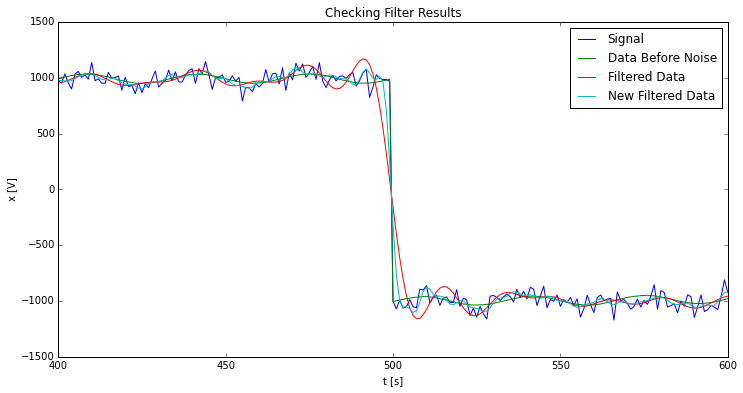

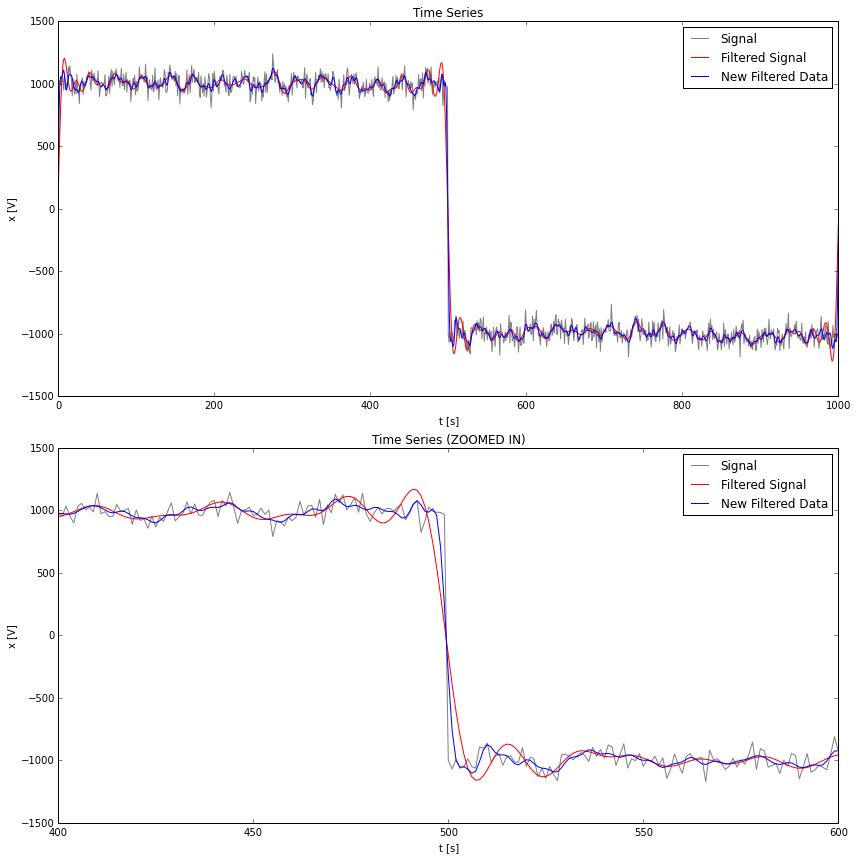

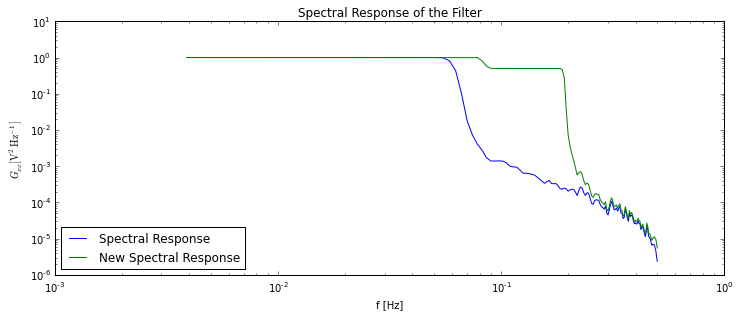

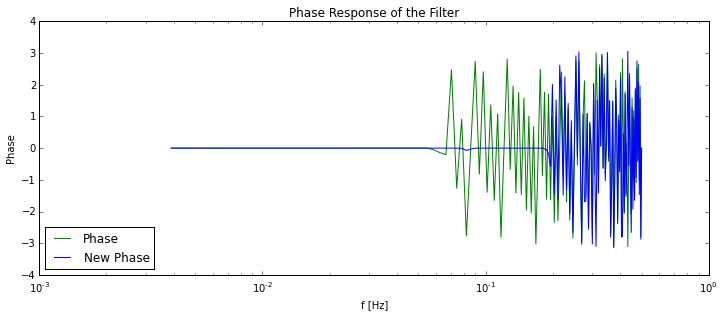

In [3]:
def applyHanningToFrequency(x,fc):
    # Fourier Transform from time to frequency domain
    X = np.fft.fft(x)
    N = np.shape(x)[0]
    freq = np.linspace(0,1./dt,N)
    
    # make the hanning vector of same size as frequency
    han = np.hanning(N)
    
    # make hanning frequency (han*freq)
    hanFreq = han*freq    
    
    # Apply the filter in the frequency domain
    X[ (hanFreq>fc) & (hanFreq<(1./dt-fc)) ] = 1.e-15
    
    # Inverse fourier transform back to the time domain
    filteredData = np.real(np.fft.ifft(X)) + np.mean(x)
    
    return filteredData
    
    
xn_filtered_new = applyHanningToFrequency(xn,frequencyCutoff)

#xn_filtered = filterData(xn,frequencyCutoff)
ax1 = checkFilter(xn,dataBeforeNoise,xn_filtered,t)
ax1.plot(t,xn_filtered_new,label='New Filtered Data')
ax1.legend()

ax2,ax3 = plotSignal(xn,xn_filtered,t)
ax2.plot(t,xn_filtered_new,label='New Filtered Data')
ax2.legend()
ax3.plot(t,xn_filtered_new,label='New Filtered Data')
ax3.legend()

#powerSignalNew,freq = mlab.csd(xn,xn,**args)
powerSignalFiltered_new,freq = mlab.csd(xn_filtered_new,xn_filtered_new,**args)
crossPower_new,freq = mlab.csd(xn,xn_filtered_new,**args)

ax4 = plotSpectra(powerSignal,powerSignalFiltered,freq)
response_new = np.abs(np.sqrt(powerSignalFiltered_new/powerSignal))
ax4.plot(freq,response_new,label='New Spectral Response')
ax4.legend(loc=3)

ax5 = plotPhase(crossPower,freq)
phase_new = np.angle(crossPower_new)
ax5.plot(freq,phase_new,label='New Phase')
ax5.legend(loc=3)

COMMENT:

Applying the hanning window to the frequency first improves the filter as shown in the 'Check Filter' plot. The smoothed data here gets closer to the sharp jump of the noise free data than it did with our previous filter. It's interesting to see that this new filter maintains a power spectrum in line with the data for longer than it did without applying the hanning window to the frequency first. This is shown in the 'Spectral Response of the Filter' plot where H(f)=1 for larger frequencies that before. We can also see that the filtered data stays in phase with the orginal data for longer as well, by seeing Phase=0 maintained for larger frequencies on the 'Phase Response of the Filter' plot.

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

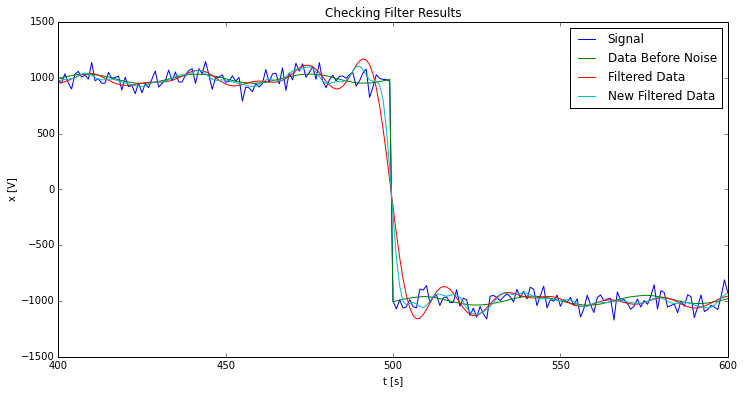

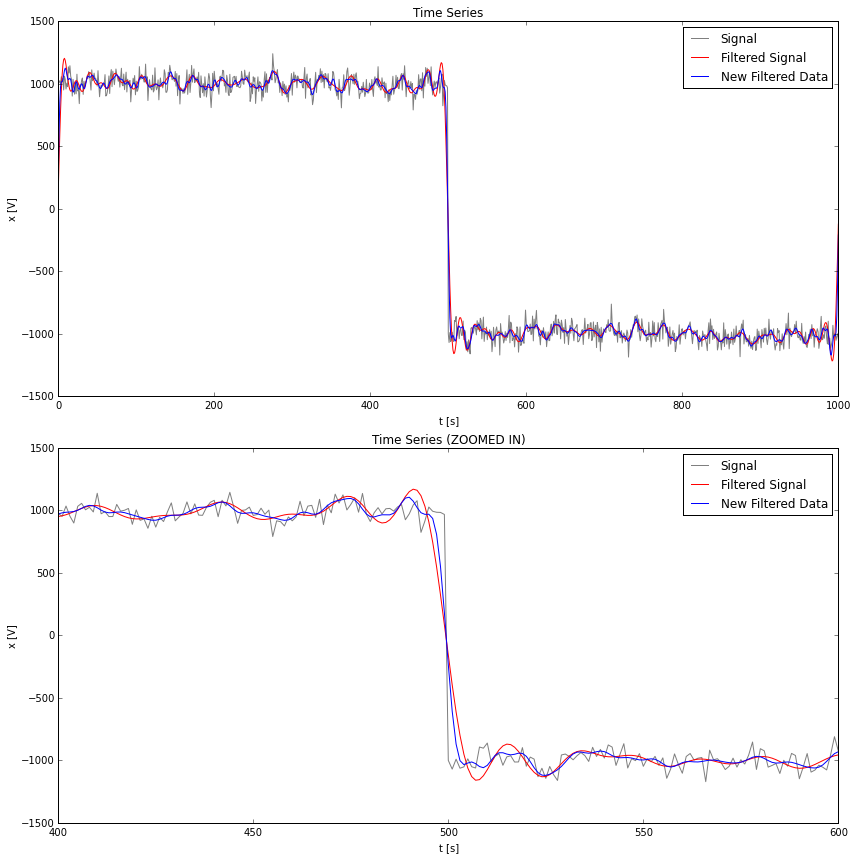

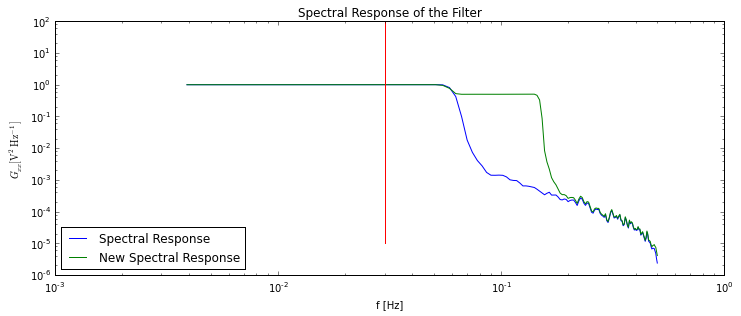

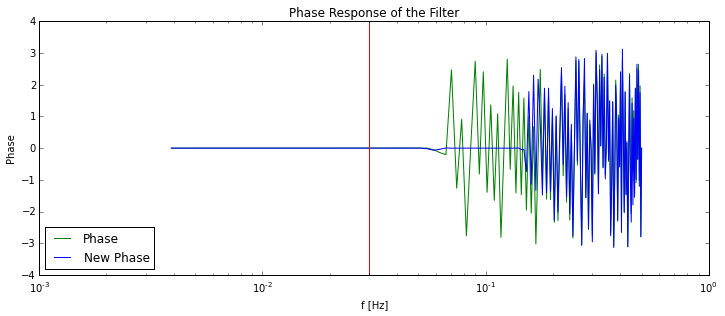

In [4]:
frequencyCutoff = 0.03 #Hz
xn_filtered_new = applyHanningToFrequency(xn,frequencyCutoff)

#xn_filtered = filterData(xn,frequencyCutoff)
ax1 = checkFilter(xn,dataBeforeNoise,xn_filtered,t)
ax1.plot(t,xn_filtered_new,label='New Filtered Data')
ax1.legend()

ax2,ax3 = plotSignal(xn,xn_filtered,t)
ax2.plot(t,xn_filtered_new,label='New Filtered Data')
ax2.legend()
ax3.plot(t,xn_filtered_new,label='New Filtered Data')
ax3.legend()

#powerSignalNew,freq = mlab.csd(xn,xn,**args)
powerSignalFiltered_new,freq = mlab.csd(xn_filtered_new,xn_filtered_new,**args)
crossPower_new,freq = mlab.csd(xn,xn_filtered_new,**args)

ax4 = plotSpectra(powerSignal,powerSignalFiltered,freq)
response_new = np.abs(np.sqrt(powerSignalFiltered_new/powerSignal))
ax4.plot(freq,response_new,label='New Spectral Response')
ax4.legend(loc=3)
ax4.plot((0.03,0.03), (10e-6,10e1), 'k-', color='red')

ax5 = plotPhase(crossPower,freq)
phase_new = np.angle(crossPower_new)
ax5.plot(freq,phase_new,label='New Phase')
ax5.legend(loc=3)
ax5.plot((0.03, 0.03), (-4, 4), 'k-', color='red')

COMMENT:

To preserve the amplitude of the sine wave at f=0.03Hz we are looking for a phase plot that shows phase=0 when f=0.03Hz. Alternatively we can set our goal to seeing a Spectral Response of the Filter graph which shows |H(f)|=1 when f=0.03Hz. The cutoff frequency was therefore adjusted to acheive these goals. We see we have succeeded by observing the behaviour of the plots at the red vertical line which is drawn at f=0.03Hz. This approach is positive if we know we are looking for a frequency around 0.03Hz, but it is negative for observing spectra around frequencies far greater or smaller than this.

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

In [5]:
# Create red noise
def createRed(N):
    t = np.arange(N*1.)
    x = np.cumsum(np.random.randn(N))
    x=x-np.mean(x)
    return x,t


# Create low pass filter
def lowPass(fc,N):
    # Calculate filter length
    filterLength = 2*int(np.ceil(1./fc))+1
    print fc,filterLength
    
    # Create Truncated Dirichlet Kernel
    k = np.array(range(-N/2+1,N/2))
    M = fc*2*N+1
    low2 = (1./N)*np.sin(np.pi*(k+0.000001)*M/N)/np.sin(np.pi*(k+0.000001)/N)
    low = low2*1. # Switch the values to floats
    low[abs(k)>filterLength+1] = 0. # Truncate the filter
    
    return k,low
    
# Create band pass filter
def bandPass(low,lower):
    band = low-lower
    
    return k,band

# Shift the filter
def shift(k,band):
    #Fourier transform from time to frequency domain
    X = np.fft.fft(band)
    dt = k[1] - k[0]
    N = np.shape(band)[0]
    frequencies = np.linspace(0,1./dt,N)
    
    #Convolve with dirac delta function
    delta = sympy.DiracDelta(0.001)
    SHIFTED = np.convolve(X,delta,'same')
    
    #Inverse Fourier Transform back to the time domain
    band_shifted = np.fft.ifft(SHIFTED)
    
    return k,band_shifted

# Plot the filter
def plotFilter(k,band,band_shifted):
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,1)

    ax=plt.subplot(gs[0:1])
    ax.plot(k,band,'k',label='Not Shifted')
    ax.plot(k,band_shifted,color='red',label='Shifted')
    ax.set_xlabel('k [s]')
    ax.set_ylabel('$h_k$')
    ax.set_title('TDK Band Pass Filter Centered at 0.1Hz with width 0.1Hz')
    ax.set_xlim(left=-100,right=100)
    ax.legend()
    
    return ax
    
# Apply the filter
def applyFilter(data,filt):
    data_filtered = np.convolve(data,filt,'same')
    return data_filtered

# Plot the spectra
def plotEachSpectra(Gxx,Gyy,Gxy,f):
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,1)
    ax=plt.subplot(gs[0:1])
    ax.plot(f,Gxx,label='Data')
    ax.plot(f,Gyy,label='Filtered Data')
    ax.plot(f,Gxy,label='Cross Spectrum of Data and Filtered Data')
    ax.legend(loc=3)
    ax.loglog()
    ax.set_xlabel('f [Hz]')
    ax.set_ylabel(r'$G_{xx} \mathrm{[V^2 Hz^{-1}]}$')
    ax.set_title('Spectra')

0.15 15
0.05 41


C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


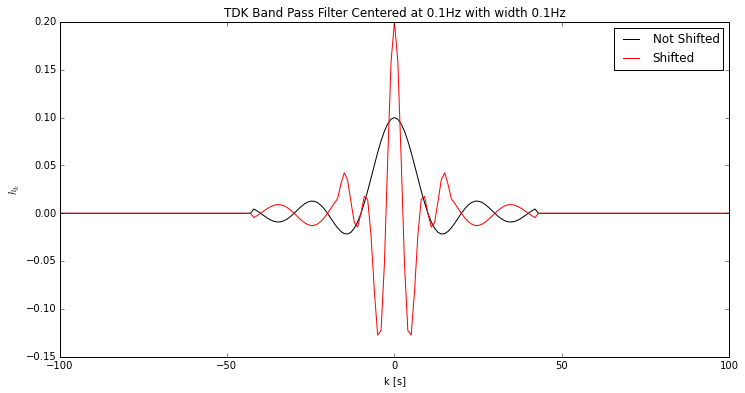

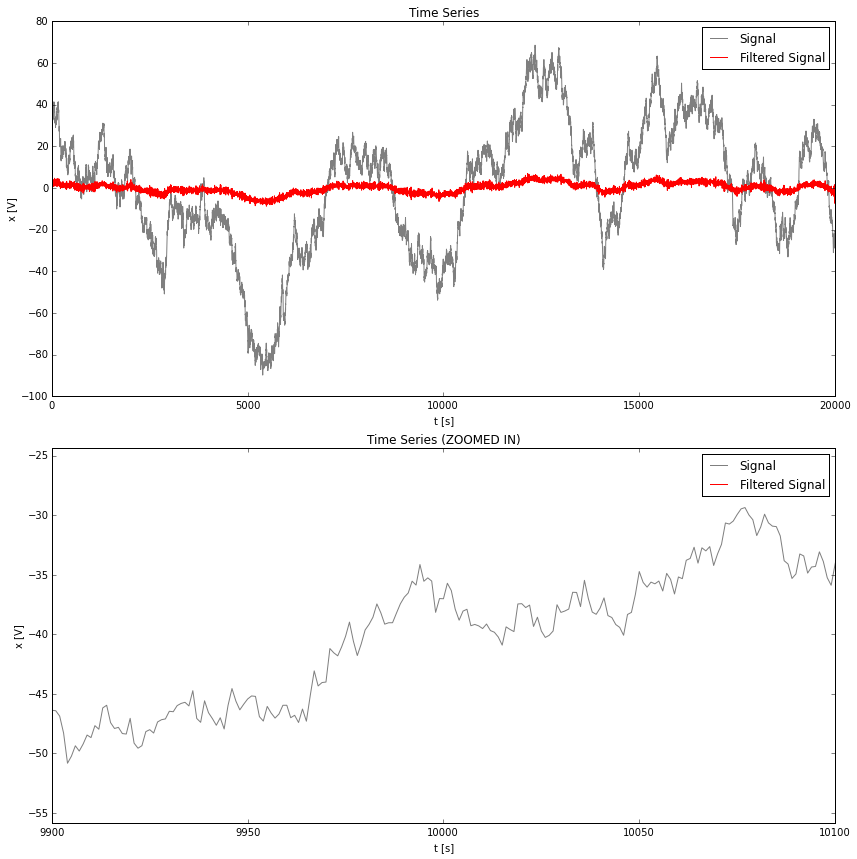

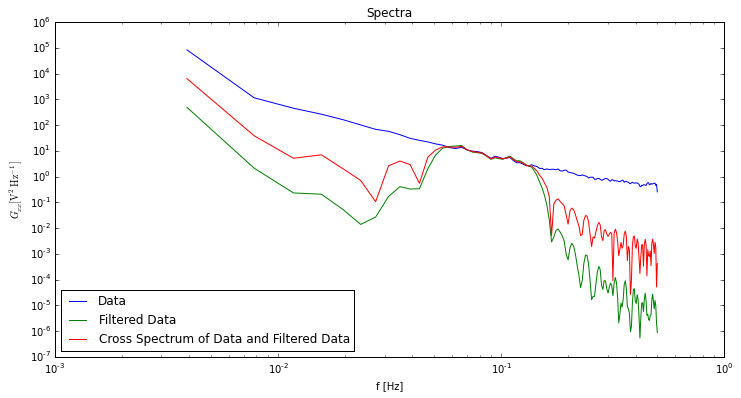

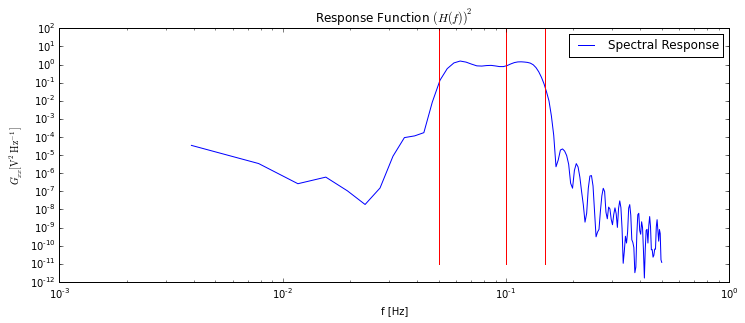

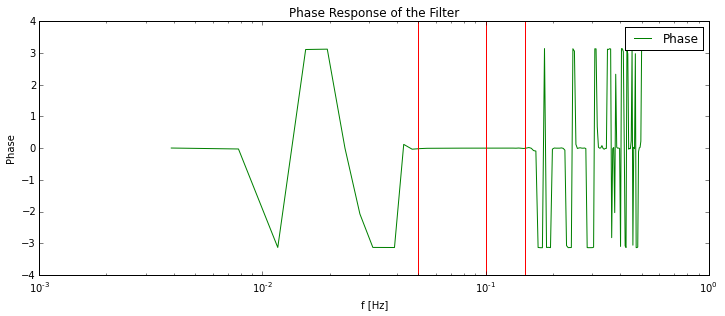

In [6]:
# Run the functions
N = 20000
fc = 0.1

x,t= createRed(N)

k,low = lowPass(0.15,N)
k,lower = lowPass(0.05,N)
k,band = bandPass(low,lower)
ax1 = plotFilter(k,lower,band)
x_smooth = applyFilter(x,band)
ax2,ax3 = plotSignal(x,x_smooth,t)

# Zoom in on the signal
left = N/2-100
right = N/2+100
bottom = np.min(x[left:right]) - 5
top = np.max(x[left:right]) + 5
ax3.set_xlim(left=left,right=right)
ax3.set_ylim(bottom=bottom,top=top)

# Continue running the functions
powerX,freq = mlab.csd(x,x,**args)
powerX_smooth,freq = mlab.csd(x_smooth,x_smooth,**args)
crossPowerX,freq = mlab.csd(x,x_smooth,**args)

plotEachSpectra(powerX,powerX_smooth,np.abs(crossPowerX),freq)

ax3 = plotSpectra(powerX,powerX_smooth,freq,squared=True)
ax3.set_title('Response Function $(H(f))^2$')
ax3.plot((0.1, 0.1), (10e-12, 10e1), 'k-', color='red')
ax3.plot((0.15, 0.15), (10e-12, 10e1), 'k-', color='red')
ax3.plot((0.05, 0.05), (10e-12, 10e1), 'k-', color='red')

ax4 = plotPhase(crossPowerX,freq)
ax4.plot((0.1, 0.1), (-4, 4), 'k-', color='red')
ax4.plot((0.15, 0.15), (-4, 4), 'k-', color='red')
ax4.plot((0.05, 0.05), (-4, 4), 'k-', color='red')

COMMENT:

As there is zero phase at 0.1Hz and the spectral response is approximately 1 at 0.1Hz we can see that our filter indeed passed the right frequencies. However, looking at the Time Series (ZOOMED IN) plot we can see that the data itself was modified in magnituded. Thus, this filter would be a poor choice in situations where the magnitude of points along the time series need to be preserved as well.

Note that the vertical red lines in the last 2 plots are positioned at f=0.05, f=0.1, and f=0.15 Hz. This highlights the uniformality of the plots within our chosen window.

## Q3: Bandpass the weather data

In [3]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

(<matplotlib.axes._subplots.AxesSubplot at 0xd085630>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe0ba828>)

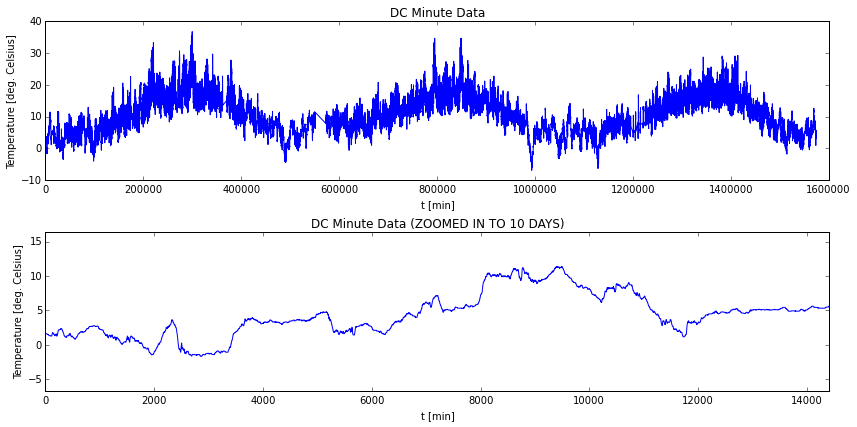

In [4]:
def plotData(dc):
    # Plot data
    t = np.arange(len(dc))
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(2,1)
    ax1=plt.subplot(gs[0:1])
    ax1.plot(t,dc,label='Unfiltered')
    ax1.set_xlabel('t [min]')
    ax1.set_ylabel('Temperature [deg. Celsius]')
    ax1.set_title('DC Minute Data')

    # Plot zoomed data
    tenDays = 60*24*10
    ax2=plt.subplot(gs[1:2])
    ax2.plot(t,dc,label='Unfiltered')
    ax2.set_xlabel('t [min]')
    ax2.set_ylabel('Temperature [deg. Celsius]')
    ax2.set_title('DC Minute Data (ZOOMED IN TO 10 DAYS)')
    left = 0
    right = tenDays
    bottom = np.min(dc[left:right]) - 5
    top = np.max(dc[left:right]) + 5
    ax2.set_xlim(left=left,right=right)
    ax2.set_ylim(bottom=bottom,top=top)

    plt.tight_layout()
    
    return ax1,ax2

plotData(dc)

In [5]:
# Apply the elliptical filter
def applyEllipse(x,t,N):
    minutesInADay = 24*60
    dailyFrequency = 1./minutesInADay # 0.000694 minutes^-1
    
    dt = t[1] - t[0]
    fp = 0.07
    fs = 0.12
    fNyq = 1./2./dt
    
    wp = [0.2, 0.5]
    ws = [0.1, 0.6]
    
    wp = dailyFrequency - 0.5*dailyFrequency
    ws = dailyFrequency + 0.5*dailyFrequency
    gpass = 0.1
    gstop = 40.0
    analog = False
    
    #n,fn=signal.ellipord(fp/fNyq, fs/fNyq,.1, 40.)
    n,fn = signal.ellipord(wp,ws,gpass,gstop,analog)
    b,a=signal.ellip(n,.1,40.,0.005)
    x_smooth = signal.lfilter(b,a,x)

    return x_smooth

# Plot the power sprectrum of the unfiltered and filtered signals
def plotDCPower(t,x,x_smooth,args):
    powerX,freq = mlab.csd(x,x,**args)
    powerX_smooth,freq = mlab.csd(x_smooth,x_smooth,**args)
    
    plt.figure(figsize=(12,6))
    gs=gridspec.GridSpec(1,1)
    ax=plt.subplot(gs[0:1])
    ax.plot(freq,powerX,label='Original Data')
    ax.plot(freq,powerX_smooth,label='Filtered Data')
    ax.legend()
    ax.loglog()
    ax.set_xlabel('f [2pi/min]')
    ax.set_ylabel(r'$G_{xx} \mathrm{[V^2 Hz^{-1}]}$')
    ax.set_title('Power Spectrum')

C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


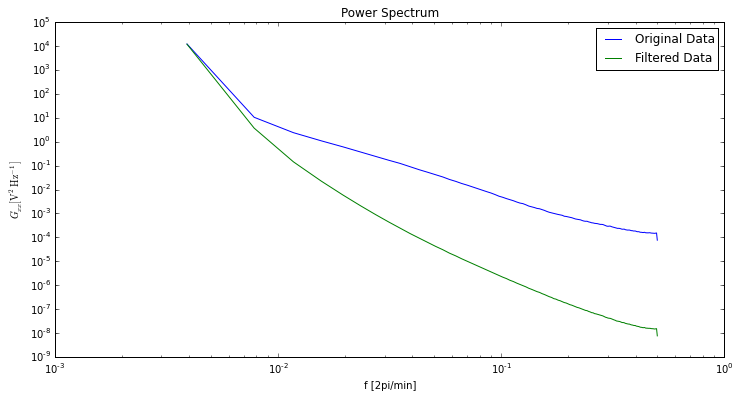

In [8]:
# Run the functions
N = len(dc)
t = np.arange(N) #minutes
dc_smooth = applyEllipse(dc,t,N)
nfft = 2**8 #256
dt = 1.
args = {'NFFT':nfft,'Fs':1./dt,'noverlap':nfft/2.,'window':mlab.window_hanning}
plotDCPower(t,dc,dc_smooth,args)

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

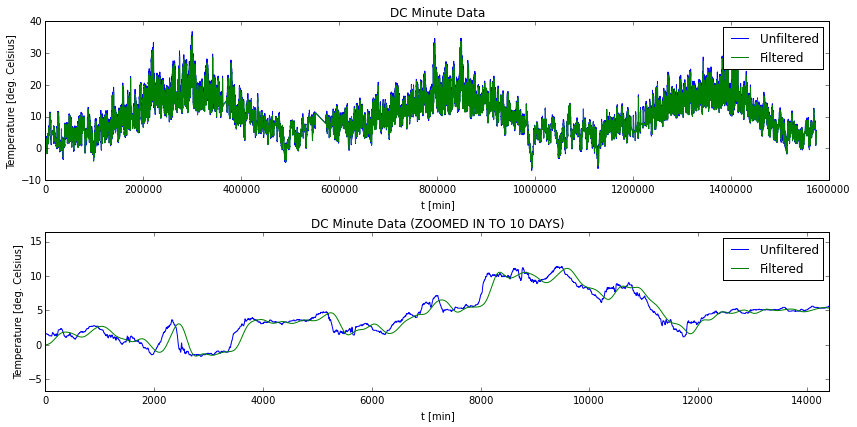

In [9]:
ax1,ax2 = plotData(dc)
ax1.plot(t,dc_smooth,label='Filtered')
ax2.plot(t,dc_smooth,label='Filtered')
ax1.legend()
ax2.legend()

COMMENT:

The amplitudes do make sense, as we can see they line up with the unfiltered time series. Interestingly there is a slight shift to the right - this translation was made smaller through the choice of my elliptical filter parameters, but does still exist. 

We can see the temperature trend repeats yearly - the amplitudes are smaller in the winter and larger in the summer. We can also see that the amplitudes vary more on a daily basis when they are in warmer - this makes sense with the seasons as our winter days are cold in the day and at night, while our summer days tend to increase in temperature a lot in the day and cool off at night.